# Library set-up
### Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation
### Read the CSV files with num_cars

In [ ]:
jan2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/jan2019withCount.csv', parse_dates=True)

jan2019

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars
0,2018-12-31 23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,48f34eaa179e51989c8f937631da1bce,6.0
1,2019-01-01 00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,ed9a57e100a83156605b19ec84bdc2fe,3.0
2,2019-01-01 00:01:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,c2713943d69482eaa4191454c76af1c8,2.0
3,2019-01-01 00:03:45+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,7892491f53adea153a2345de7d5e6873,5.0
4,2019-01-01 00:05:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fa2696a66b3c5bb982e26b765f2d1b98,4.0
...,...,...,...,...,...,...,...,...,...
30229,2019-01-31 23:54:47+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d070313c2ca6bde6c44a074d136dcf05,2.0
30230,2019-01-31 23:56:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,41786bfddd62f3138dd9d71b6210af28,6.0
30231,2019-01-31 23:57:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,afd6213f51bda947cc27b98082c21f53,1.0
30232,2019-01-31 23:58:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0c172e9da57d5e8e241d6ca05e25347e,1.0


In [ ]:
jan2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UpLevel SG Traffic/jan2020withCount.csv', parse_dates=True)

jan2020

,timestamp,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars
0,2019-12-31 23:59:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,1cc0aed7f981fccabfe22c43229a48d5,2.0
1,2020-01-01 00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,9daa712d0a50f989a8a698b6fc7dd33b,6.0
2,2020-01-01 00:01:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d623bfdab733b966ade6e390f18cd7fb,5.0
3,2020-01-01 00:02:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0ddb5b38083ebcce87c8228b746a7347,9.0
4,2020-01-01 00:03:24+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fc4923fc71ec9a99940007cea41ecf23,3.0
...,...,...,...,...,...,...,...,...,...
29935,2020-01-31 23:53:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,bb50d5020f94a869583863593c0308d8,4.0
29936,2020-01-31 23:54:50+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,f54b2765d796c244350a4db077e085cf,6.0
29937,2020-01-31 23:56:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,24c4ff81022e653f45cfb8bd0af3e276,4.0
29938,2020-01-31 23:57:30+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d85d5d9db869044c3f64b54fa5fcb41d,5.0


### Turn the timestamp strings into actual datetime objects

In [ ]:
# Change timestamp strings in the 2019 DataFrame to DateTime objects
jan2019['timestamp'] = jan2019['timestamp'].astype('datetime64')

In [ ]:
# Check whether the data type of the timestamp column was changed
jan2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30234 entries, 0 to 30233
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              30234 non-null  datetime64[ns]
 1   image                  30234 non-null  object        
 2   camera_id              30234 non-null  int64         
 3   location.latitude      30234 non-null  float64       
 4   location.longitude     30234 non-null  float64       
 5   image_metadata.height  30234 non-null  int64         
 6   image_metadata.width   30234 non-null  int64         
 7   image_metadata.md5     30234 non-null  object        
 8   num_cars               30233 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 2.1+ MB


In [ ]:
# Change timestamp strings in the 2020 DataFrame to DateTime objects
jan2020['timestamp'] = jan2020['timestamp'].astype('datetime64')

# Check whether the data type of the timestamp column was changed
jan2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29940 entries, 0 to 29939
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              29940 non-null  datetime64[ns]
 1   image                  29940 non-null  object        
 2   camera_id              29940 non-null  int64         
 3   location.latitude      29940 non-null  float64       
 4   location.longitude     29940 non-null  float64       
 5   image_metadata.height  29940 non-null  int64         
 6   image_metadata.width   29940 non-null  int64         
 7   image_metadata.md5     29940 non-null  object        
 8   num_cars               29937 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 2.1+ MB


### Set the timestamp column as the index
This will allow us to perform time series analysis on the traffic volume.

In [ ]:
jan2019.set_index('timestamp')

,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars
timestamp,,,,,,,,
2018-12-31 15:59:44,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,48f34eaa179e51989c8f937631da1bce,6.0
2018-12-31 16:00:44,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,ed9a57e100a83156605b19ec84bdc2fe,3.0
2018-12-31 16:01:25,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,c2713943d69482eaa4191454c76af1c8,2.0
2018-12-31 16:03:45,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,7892491f53adea153a2345de7d5e6873,5.0
2018-12-31 16:05:25,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fa2696a66b3c5bb982e26b765f2d1b98,4.0
...,...,...,...,...,...,...,...,...
2019-01-31 15:54:47,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d070313c2ca6bde6c44a074d136dcf05,2.0
2019-01-31 15:56:27,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,41786bfddd62f3138dd9d71b6210af28,6.0
2019-01-31 15:57:27,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,afd6213f51bda947cc27b98082c21f53,1.0


In [ ]:
jan2020.set_index('timestamp')

,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars
timestamp,,,,,,,,
2019-12-31 15:59:24,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,1cc0aed7f981fccabfe22c43229a48d5,2.0
2019-12-31 16:00:44,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,9daa712d0a50f989a8a698b6fc7dd33b,6.0
2019-12-31 16:01:44,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d623bfdab733b966ade6e390f18cd7fb,5.0
2019-12-31 16:02:44,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,0ddb5b38083ebcce87c8228b746a7347,9.0
2019-12-31 16:03:24,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fc4923fc71ec9a99940007cea41ecf23,3.0
...,...,...,...,...,...,...,...,...
2020-01-31 15:53:30,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,bb50d5020f94a869583863593c0308d8,4.0
2020-01-31 15:54:50,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,f54b2765d796c244350a4db077e085cf,6.0
2020-01-31 15:56:30,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,24c4ff81022e653f45cfb8bd0af3e276,4.0


# Exploratory data analysis
### Plot the histograms of num_car in 2019 and 2020

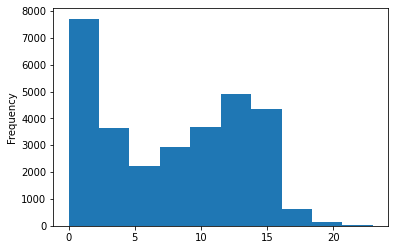

In [ ]:
# Plot a histogram with 2019 Jan num_cars
jan2019['num_cars'].plot.hist()

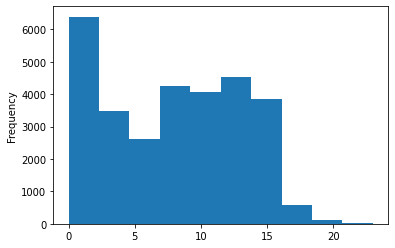

In [ ]:
# Plot a histogram with 2020 Jan num_cars
jan2020['num_cars'].plot.hist()

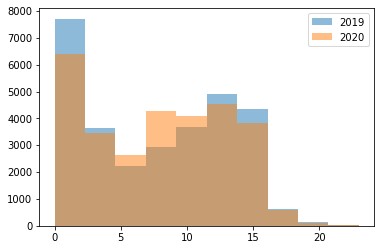

In [ ]:
# Plot both histograms in the same plot

import matplotlib.pyplot as plt

plt.hist(jan2019['num_cars'], alpha=0.5, label='2019')
plt.hist(jan2020['num_cars'], alpha=0.5, label='2020')
plt.legend(loc='upper right')
plt.show()

### Resample the DataFrames by day
We will analyze how traffic volume changed across each month.

In [ ]:
# Resample the data by the sums of daily traffic volume
# Store the resampled data in a variable
jan2019_daily = jan2019.resample('D', on='timestamp').sum()

# View the resampled data
jan2019_daily

,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,num_cars
timestamp,,,,,,
2018-12-31,558843,429.626438,33957.512192,156960,209280,1102.0
2019-01-01,1572280,1208.734931,95537.954790,441600,588800,5476.0
2019-01-02,1626968,1250.777885,98861.014087,456960,609280,7017.0
2019-01-03,1674820,1287.565470,101768.690972,470400,627200,7597.0
2019-01-04,1638931,1259.974782,99587.933308,460320,613760,7787.0
2019-01-05,1613296,1240.267147,98030.249263,453120,604160,7579.0
2019-01-06,1642349,1262.602466,99795.624514,461280,615040,6756.0
2019-01-07,1686783,1296.762366,102495.610193,473760,631680,7919.0
2019-01-08,1661148,1277.054732,100937.926148,466560,622080,7586.0


In [ ]:
# Resample the data by the sums of daily traffic volume
# Store the resampled data in a variable
jan2020_daily = jan2020.resample('D', on='timestamp').sum()

# View the resampled data
jan2020_daily

,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,num_cars
timestamp,,,,,,
2019-12-31,548589,421.743384,33334.438573,154080,205440,1362.0
2020-01-01,1710709,1315.156159,103949.448636,480480,640640,6283.0
2020-01-02,1667984,1282.310101,101353.308560,468480,624640,7559.0
2020-01-03,1679947,1291.506997,102080.227781,471840,629120,8360.0
2020-01-04,1710709,1315.156159,103949.448636,480480,640640,7817.0
2020-01-05,1676529,1288.879313,101872.536575,470880,627840,7052.0
2020-01-06,1772233,1362.454482,107687.890345,497760,663680,7937.0
2020-01-07,1703873,1309.900790,103534.066223,478560,638080,7855.0
2020-01-08,1685074,1295.448524,102391.764590,473280,631040,8184.0


### Plot the daily traffic volume

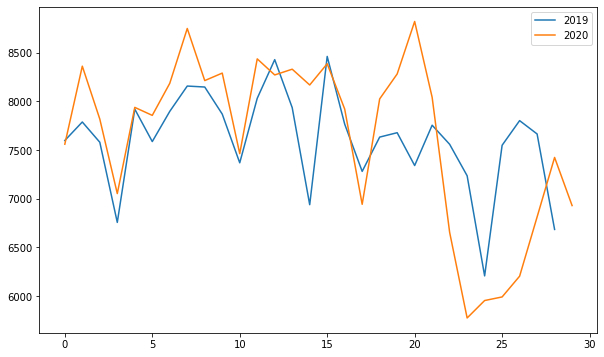

In [ ]:
# Plot the daily volume for 2019
plt.plot(jan2019_daily['num_cars'][1:].values, label='2019')

# Plot the daily volume for 2020
plt.plot(jan2020_daily['num_cars'][1:].values, label='2020')

# Add a legend to the graph
plt.legend(loc='upper right')

# Store the current figure in a variable
fig = plt.gcf()

# Set the size of the figure
fig.set_size_inches(10,6)

# Show the figure
plt.show()

<p align='justify'> For the majority of January 2020, there was no significant difference in traffic volume compared to the same month in 2019. However, traffic from January 23 to 27, 2020 was lower by several hundred cars per day versus the same period in the previous year. As Singapore reported its first COVID-19 case on January 23, 2020 <i><a href='https://www.channelnewsasia.com/news/singapore/singapore-covid-19-outbreak-evolved-coronavirus-deaths-timeline-12639444'> (Channel News Asia, 2020),</a> </i> we may infer that this event was associated with the relatively lower traffic levels. </p>

### Create a weekday column for the resampled DataFrames

Now that we've seen how traffic volume changed throughout each month, we will will check for trends based on the day of the week.



In [ ]:
# Add the dayOfWeek column for 2019 DataFrame
jan2019_daily['dayOfWeek'] = jan2019_daily.index.dayofweek

# Check whether the column was added
jan2019_daily

,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,num_cars,dayOfWeek
timestamp,,,,,,,
2018-12-31,558843,429.626438,33957.512192,156960,209280,1102.0,0
2019-01-01,1572280,1208.734931,95537.954790,441600,588800,5476.0,1
2019-01-02,1626968,1250.777885,98861.014087,456960,609280,7017.0,2
2019-01-03,1674820,1287.565470,101768.690972,470400,627200,7597.0,3
2019-01-04,1638931,1259.974782,99587.933308,460320,613760,7787.0,4
2019-01-05,1613296,1240.267147,98030.249263,453120,604160,7579.0,5
2019-01-06,1642349,1262.602466,99795.624514,461280,615040,6756.0,6
2019-01-07,1686783,1296.762366,102495.610193,473760,631680,7919.0,0
2019-01-08,1661148,1277.054732,100937.926148,466560,622080,7586.0,1


In [ ]:
# Add the dayOfWeek column for 2020 DataFrame
jan2020_daily['dayOfWeek'] = jan2020_daily.index.dayofweek

# Check whether the column was added
jan2020_daily

,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,num_cars,dayOfWeek
timestamp,,,,,,,
2019-12-31,548589,421.743384,33334.438573,154080,205440,1362.0,1
2020-01-01,1710709,1315.156159,103949.448636,480480,640640,6283.0,2
2020-01-02,1667984,1282.310101,101353.308560,468480,624640,7559.0,3
2020-01-03,1679947,1291.506997,102080.227781,471840,629120,8360.0,4
2020-01-04,1710709,1315.156159,103949.448636,480480,640640,7817.0,5
2020-01-05,1676529,1288.879313,101872.536575,470880,627840,7052.0,6
2020-01-06,1772233,1362.454482,107687.890345,497760,663680,7937.0,0
2020-01-07,1703873,1309.900790,103534.066223,478560,638080,7855.0,1
2020-01-08,1685074,1295.448524,102391.764590,473280,631040,8184.0,2


### Perform a groupby operation with the dayOfWeek and get the mean
We will check the average traffic volume for each day of the week.

In [ ]:
# Drop the first row of the dataframe, which contains data from 2018
jan2019_daily = jan2019_daily.drop(labels=jan2019_daily.index.values[0], axis=0)

# Check whether the row was dropped
jan2019_daily.head()

,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,num_cars,dayOfWeek
timestamp,,,,,,,
2019-01-02,1626968,1250.777885,98861.014087,456960,609280,7017.0,2
2019-01-03,1674820,1287.565470,101768.690972,470400,627200,7597.0,3
2019-01-04,1638931,1259.974782,99587.933308,460320,613760,7787.0,4
2019-01-05,1613296,1240.267147,98030.249263,453120,604160,7579.0,5
2019-01-06,1642349,1262.602466,99795.624514,461280,615040,6756.0,6


In [ ]:
# Perform a groupby on dayOfWeek for 2019 DataFrame
jan2019_dailyMean = jan2019_daily.groupby(by='dayOfWeek').mean()

# Check whether the groupby operation was performed
jan2019_dailyMean

,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,num_cars
dayOfWeek,,,,,,
0,1686355.75,1296.433906,102469.648792,473640.0,631520.0,7782.25
1,1667300.40,1281.784564,101311.770319,468288.0,624384.0,7393.40
2,1677212.60,1289.404849,101914.074816,471072.0,628096.0,7570.20
3,1546986.80,1189.290065,94001.039865,434496.0,579328.0,7425.80
4,1659011.75,1275.412429,100808.119144,465960.0,621280.0,7987.75
5,1650894.00,1269.171678,100314.852529,463680.0,618240.0,7611.75
6,1667129.50,1281.653180,101301.385758,468240.0,624320.0,6902.75


In [ ]:
# Drop the first row of the 2020 dataframe, which contains data from the previous year
jan2020_daily = jan2020_daily.drop(labels=jan2020_daily.index.values[0], axis=0)

# Check whether the first row was dropped
jan2020_daily.head()

,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,num_cars,dayOfWeek
timestamp,,,,,,,
2020-01-01,1710709,1315.156159,103949.448636,480480,640640,6283.0,2
2020-01-02,1667984,1282.310101,101353.308560,468480,624640,7559.0,3
2020-01-03,1679947,1291.506997,102080.227781,471840,629120,8360.0,4
2020-01-04,1710709,1315.156159,103949.448636,480480,640640,7817.0,5
2020-01-05,1676529,1288.879313,101872.536575,470880,627840,7052.0,6


In [ ]:
# Perform a groupby on dayOfWeek for the 2020 DataFrame
jan2020_dailyMean = jan2020_daily.groupby(by='dayOfWeek').mean()

# Check whether the groupby operation was performed
jan2020_dailyMean

,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,num_cars
dayOfWeek,,,,,,
0,1701309.50,1307.930026,103378.297819,477840.0,637120.0,7596.75
1,1640212.75,1260.960163,99665.817511,460632.0,614168.0,7652.25
2,1663540.60,1278.894111,101083.309992,467232.0,622976.0,7685.40
3,1646450.60,1265.755688,100044.853962,462432.0,616576.0,7987.20
4,1497084.00,1150.925869,90968.748257,420480.0,560640.0,7708.00
5,1666275.00,1280.996259,101249.462957,468000.0,624000.0,7450.25
6,1638076.50,1259.317860,99536.010507,460080.0,613440.0,6852.50


### Plot the mean traffic volume on each day of the week in 2019 and 2020


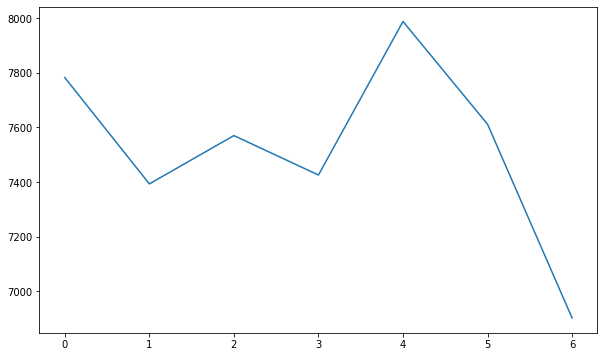

In [ ]:
# Plot a lineplot with dayOfWeek (the index) and the num_cars values for 2019
plt.plot(jan2019_dailyMean['num_cars'])

# Store the current figure in a variable
fig = plt.gcf()

# Set the dimensions of the current figure
fig.set_size_inches(10,6)

# Show the figure
plt.show()

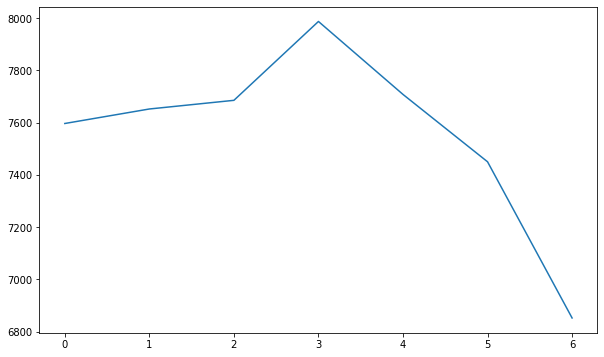

In [ ]:
# Plot a lineplot with dayOfWeek (the index) and the num_cars values for 2020
plt.plot(jan2020_dailyMean['num_cars'])

# Store the current figure in a variable
fig = plt.gcf()

# Set the dimensions of the current figure
fig.set_size_inches(10,6)

# Show the figure
plt.show()

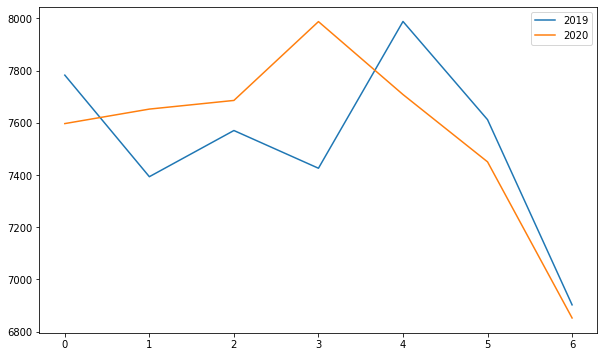

In [ ]:
# Plot a lineplot with dayOfWeek (the index) and the num_cars values for both years on the same plot
plt.plot(jan2019_dailyMean['num_cars'].values, label='2019')
plt.plot(jan2020_dailyMean['num_cars'].values, label='2020')
plt.legend(loc='upper right')
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Average traffic volume on each day of the week in 2019 and 2020 does not appear to have differed significantly. This suggests that the start of the COVID-19 outbreak was not correlated with a notable shift in weekly traffic trends.